Instalando / Importando das bibliotecas utilizadas

In [2]:
# O pacote Unidecode foi utilizado para remoção dos acentos nos nomes de bairros 
!pip install unidecode

import re
import datetime
import heapq

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from unidecode import unidecode

     |████████████████████████████████| 235 kB 37.6 MB/s 


**Lendo do dataset e mostrando os 5 primeiros itens no dataset**

In [3]:
# O delimitador do dataset é ';' e não ',', então precisa-se explicitar o uso do parâmetro 'delimiter' na leitura
df = pd.read_csv('https://covid19.manaus.am.gov.br/wp-content/uploads/Manaus.csv', delimiter=';')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,6,7,8,9,10,11,12,13,14,15,16,17,18,22,23,26,27,28,29,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,_dt_evolucao,_dt_notificacao,_dt_sintomas,_classificacao,_conclusao,_origem,_comorb_cardio,_comorb_cromossomica,_comorb_diabetes,_comorb_hemato,_comorb_hepatica,_comorb_imuno,_comorb_neurologica,_comorb_obessidade,_comorb_renal,_comorb_respiratoria,_criterio,_etnia,_evolução,_idade,_faixa etária,_gestante,_profiss_saude,_raca,_se_notificacao,_sexo,_sintoma_dispneia,_sintoma_febre,_sintoma_garganta,_sintoma_tosse,_sintoma_outros,_srag,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro,_bairro_mapa,_distrito,_taxa
0,25/01/2020 00:00,03/01/2020 00:00,01/01/2020 00:00,Descartado,Recuperado,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado,4.0,1a - 4a,NaN,NaN,Parda,1.0,M,Sim,Sim,Sim,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,TARUMA,TARUMÃ,OESTE,"0,243042897"
1,03/01/2020 00:00,03/01/2020 00:00,01/01/2020 00:00,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado,26.0,20a - 29a,NaN,NaN,Parda,1.0,F,Sim,Sim,Sim,Sim,Sim,Influenza B,NaN,NaN,NaN,TARUMA-ACU,TARUMÃ-AÇÚ,OESTE,"0,684931507"
2,05/01/2020 00:00,03/01/2020 00:00,03/01/2020 00:00,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado em UTI,27.0,20a - 29a,NaN,NaN,Parda,1.0,M,Sim,Sim,Sim,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,JORGE TEIXEIRA,JORGE TEIXEIRA,LESTE,"0,073137374"
3,16/01/2020 00:00,08/01/2020 00:00,04/01/2020 00:00,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado em UTI,94.0,80a ou +,NaN,NaN,Parda,2.0,M,Sim,Sim,Sim,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,FLORES,FLORES,SUL,"0,198306463"
4,11/01/2020 00:00,08/01/2020 00:00,05/01/2020 00:00,Descartado,Recuperado,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado,0.0,< 1a,NaN,NaN,Parda,2.0,M,Sim,Sim,NaN,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,CIDADE DE DEUS,CIDADE DE DEUS,NORTE,"0,117699678"


**Quantos atributos descrevem cada exemplo? Quais são eles?**

*R: Utilizando df.shape vemos que cada linha do dataset contém 39 colunas, ou atributos, para cada um dos exemplos.*

In [ ]:
exemplos, atributos = df.shape
print('A base de dados contém {} atributos para cada um dos {} exemplos'.format(atributos, exemplos))

A base de dados contém 39 atributos para cada um dos 243984 exemplos


**Quantos casos confirmados há em Manaus, cumulativamente?**

*R: Utilizando-se do método value_counts aplicado à coluna _classificacao obtemos a informação de que em Manaus, de forma cumulativa, houve 80.420 casos confirmados*

In [7]:
print('Casos confirmados em Manaus: {}'.format(df._classificacao.value_counts()[1]))
df._conclusao.value_counts()

Casos confirmados em Manaus: 80420


Recuperado                 176027
Óbito                        4690
Óbito por outras causas       211
Name: _conclusao, dtype: int64

**A qual período de tempo a base de dados se refere, isto é, qual o registro mais antigo e qual o mais recente? Leve em conta a data de notificação.**

*R: Utilizando-se dos métodos max e min do python podemos obter a informação de que registro mais antigo foi de 01/01/2020 e o mais recente foi de 31/10/2020*

In [ ]:
data_de_notificacao = df._dt_notificacao.dropna().tolist()
data_de_notificacao = [datetime.datetime.strptime(date.split()[0], '%d/%m/%Y').strftime('%Y-%m-%d') for date in data_de_notificacao]

print('Data de notificação mais recente: ', max(data_de_notificacao))
print('Data de notificação mais antiga: ', min(data_de_notificacao))

Data de notificação mais recente:  2020-12-29
Data de notificação mais antiga:  2020-01-01


**Removendo os atributos que não serão utilizados e mostrando os 5 primeiros itens da base de dados modificada**

In [8]:

df2 = df.copy()
df2.drop(['_dt_sintomas', 
          '_comorb_cardio', 
          '_comorb_cromossomica', 
          '_comorb_diabetes', 
          '_comorb_hemato', 
          '_comorb_hepatica', 
          '_comorb_imuno', 
          '_comorb_neurologica', 
          '_comorb_obessidade', 
          '_comorb_renal', 
          '_comorb_respiratoria',
          '_sintoma_dispneia',
          '_sintoma_febre',
          '_sintoma_garganta',
          '_sintoma_tosse',
          '_sintoma_outros',
          '_etnia', 
          '_origem', 
          '_raca',
          '_se_notificacao',
          '_srag',
          '_distrito',
          '_taxa',
          '_bairro',
          '_criterio',
          '_evolução',
          '_gestante',
          '_profiss_saude',
          '_teste_antigeno',
          '_teste_anticorpo',
          '_teste_pcr'], axis=1, inplace=True)

df2 = df2.dropna()
df2.head()

,_dt_evolucao,_dt_notificacao,_classificacao,_conclusao,_idade,_faixa etária,_sexo,_bairro_mapa
0,25/01/2020 00:00,03/01/2020 00:00,Descartado,Recuperado,4.0,1a - 4a,M,TARUMÃ
1,03/01/2020 00:00,03/01/2020 00:00,Descartado,Óbito,26.0,20a - 29a,F,TARUMÃ-AÇÚ
2,05/01/2020 00:00,03/01/2020 00:00,Descartado,Óbito,27.0,20a - 29a,M,JORGE TEIXEIRA
3,16/01/2020 00:00,08/01/2020 00:00,Descartado,Óbito,94.0,80a ou +,M,FLORES
4,11/01/2020 00:00,08/01/2020 00:00,Descartado,Recuperado,0.0,< 1a,M,CIDADE DE DEUS


**Quantos exemplos e atributos há na base de dados após a limpeza e organização**

*R: A nova base de dados contém 8 atributos para cada um dos 106872 exemplos*

In [ ]:
exemplos, atributos = df2.shape
print('A nova base de dados contém {} atributos para cada um dos {} exemplos'.format(atributos, exemplos))

A nova base de dados contém 8 atributos para cada um dos 106872 exemplos


**Qual a porcentagem de indivíduos recuperados em relação ao todo?**

R: A porcentagem de indivíduos recuperados é de 95.44 %

In [ ]:
print('Porcentagem de indivíduos recuperados: {:.2f} %'.format(df2._conclusao.value_counts()['Recuperado'] * 100 / df2._conclusao.count()))

Porcentagem de indivíduos recuperados: 95.44 %


**Os casos acometeram mais indivíduos do sexo masculino ou feminino?**

*R: Os casos aconteceram mais em mulheres com 60051 casos registrados*

In [ ]:
df_casos_por_sexo = df2._sexo.value_counts()
lista_casos_por_sexo = df_casos_por_sexo.tolist()
maior_numero_de_casos = max(lista_casos_por_sexo)
idx_sexo = df_casos_por_sexo.index[lista_casos_por_sexo.index(maior_numero_de_casos)]

print('Os casos aconteceram mais em {}. {} casos registrados'.format('mulheres' if idx_sexo == 'F' else 'homens', maior_numero_de_casos))

Os casos aconteceram mais em mulheres. 60051 casos registrados


**Qual a média e desvio padrão de idade dos indivíduos que contraíram COVID-19? Qual o indivíduo mais jovem e o mais idoso a contraírem tal enfermidade?**

*R:*
- *Média de idades: 39.90*

- *Desvio padrão de idades: 17.22*

- *Idade do indivíduo mais novo:  0.0*

- *Idade do indivíduo mais idoso:  388.0*

In [ ]:
idades = df._idade.dropna().tolist()
print('Média de idades: {:.2f}'.format(np.average(idades)))
print('Desvio padrão de idades: {:.2f}'.format(np.std(idades)))
print('Idade do indivíduo mais novo: ', min(df._idade.dropna()))
print('Idade do indivíduo mais idoso: ', max(df._idade.dropna()))

Média de idades: 39.90
Desvio padrão de idades: 17.22
Idade do indivíduo mais novo:  0.0
Idade do indivíduo mais idoso:  388.0


**Qual o bairro com maior incidência de casos?**

*R: O bairro com maior incidencia de casos é o bairro SÃO JOSÉ OPERÁRIO com 9020 registros*

In [ ]:
def reformat_string(word):
  return unidecode(word.strip().lower())

def compare_first_five_letters(string_a, string_b):
  if len(string_a) < 5 or len(string_b) < 5:
    return False

  string_a = reformat_string(string_a)
  string_b = reformat_string(string_b)

  return string_a[:5] == string_b[:5]

indices_bairros = df2._bairro_mapa.value_counts().keys().tolist()
valores_bairros = df2._bairro_mapa.value_counts().tolist()

for i in range(len(indices_bairros)):
  for j in range(i + 1, len(indices_bairros)):
    if compare_first_five_letters(indices_bairros[i], indices_bairros[j]):
      valores_bairros[i] += valores_bairros[j]

indice_alvo = valores_bairros.index(max(valores_bairros))

print('O bairro com maior incidencia de casos é o bairro {} com {} registros'.format(indices_bairros[indice_alvo], valores_bairros[indice_alvo]))

O bairro com maior incidencia de casos é o bairro SÃO JOSÉ OPERÁRIO com 9020 registros


**Quais os três bairros com maior incidência de casos recuperados?**

*R: Os três bairros com maior incidência de casos recuperados são (em ordem descrescente):*

- *CIDADE NOVA com 16760 recuperações*

- *SÃO JOSÉ OPERÁRIO com 9294 recuperações*

- *FLORES com 7620 recuperações*

In [ ]:
tres_bairros = df[['_conclusao', '_bairro_mapa']].dropna()
tres_bairros = tres_bairros[(tres_bairros['_conclusao'] == 'Recuperado')]

indices_bairros_recuperados = tres_bairros._bairro_mapa.value_counts().keys().tolist()
valores_bairros_recuperados = tres_bairros._bairro_mapa.value_counts().tolist()

for i in range(len(indices_bairros_recuperados)):
  for j in range(i + 1, len(indices_bairros_recuperados)):
    if compare_first_five_letters(indices_bairros_recuperados[i], indices_bairros_recuperados[j]):
      valores_bairros_recuperados[i] += valores_bairros_recuperados[j]

tres_maiores_quantidades = heapq.nlargest(3, valores_bairros_recuperados)
indices_alvo = [valores_bairros_recuperados.index(tres_maiores_quantidades[0]), 
                valores_bairros_recuperados.index(tres_maiores_quantidades[1]), 
                valores_bairros_recuperados.index(tres_maiores_quantidades[2])]

print('Os três bairros com maior incidência de casos recuperados são (em ordem descrescente):')
print('{} com {} recuperações'.format(indices_bairros_recuperados[indices_alvo[0]], tres_maiores_quantidades[0]))
print('{} com {} recuperações'.format(indices_bairros_recuperados[indices_alvo[1]], tres_maiores_quantidades[1]))
print('{} com {} recuperações'.format(indices_bairros_recuperados[indices_alvo[2]], tres_maiores_quantidades[2]))

Os três bairros com maior incidência de casos recuperados são (em ordem descrescente):
CIDADE NOVA com 16760 recuperações
SÃO JOSÉ OPERÁRIO com 9294 recuperações
FLORES com 7620 recuperações


**Quais os tipos de testes efetuados, segundo os dados? Indique os dados de maneira quantitativa e percentual.**

R: Os testes encontrados na base de dados são: PCR, ANTÍGENO, ANTICORPO

In [ ]:
df_testes = df[['_teste_pcr', '_teste_antigeno', '_teste_anticorpo']].dropna()
print(df_testes._teste_pcr.value_counts())
print(df_testes._teste_antigeno.value_counts())
print(df_testes._teste_anticorpo.value_counts())

1.0    507
2.0    159
3.0     45
4.0     10
6.0      2
5.0      2
9.0      1
Name: _teste_pcr, dtype: int64
1.0    639
2.0     74
3.0      7
4.0      5
7.0      1
Name: _teste_antigeno, dtype: int64
1.0    511
2.0    141
3.0     52
4.0     12
5.0      7
6.0      3
Name: _teste_anticorpo, dtype: int64


**Qual taxa de letalidade pode ser calculada a partir do conjunto de dados? Para calcular esta taxa, considere a fração do total de óbitos pelo total de casos;**

*R: A taxa de letalidade é de 2.58 %*

In [ ]:
letalidade = df2._conclusao.value_counts()['Óbito'] * 100 / df._conclusao.notnull().sum()
print("Taxa de letalidade: {:.2f} %".format(letalidade))

Taxa de letalidade: 2.58 %


**Qual o tipo de correlação, mediante coeficiente de correlação de Pearson, entre a idade e o número de casos? Para responder a esta pergunte, agrupe o número de casos por idade e efetue o cálculo de tal coeficiente. Indique, a partir do resultado, a natureza desta correlação, se é positiva ou negativa, e qual sua intensidade.**

R: Utilizando o método corr, vemos que não há correlação entre os atributos _idade e _conclusao

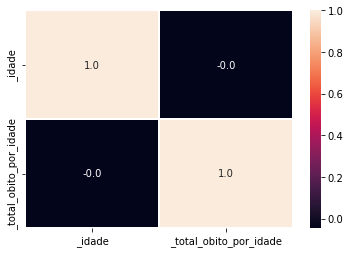

In [9]:
df_corr = df2[['_idade', '_conclusao']].dropna()

df_corr['_óbito'] = [1 if i == 'Óbito' else 0 for i in df_corr._conclusao]
df_corr_aux = df_corr.groupby(['_idade'])['_óbito'].agg('sum')
df_corr = pd.DataFrame({'_idade': df_corr_aux.index, '_total_obito_por_idade': df_corr_aux.values})

correlacao = df_corr.corr(method='pearson')
plot = sn.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)
plot

**Construa um histograma denotando a quantidade de casos nos 10 bairros em que houve mais casos registrados. Inclua todos os bairros remanescentes em uma categoria denominada “Outros.” Denote as informações de maneira percentual; Qual o bairro com maior incidência de casos?**

R: O bairro com maior incidencia de casos é SÃO JOSÉ OPERÁRIO

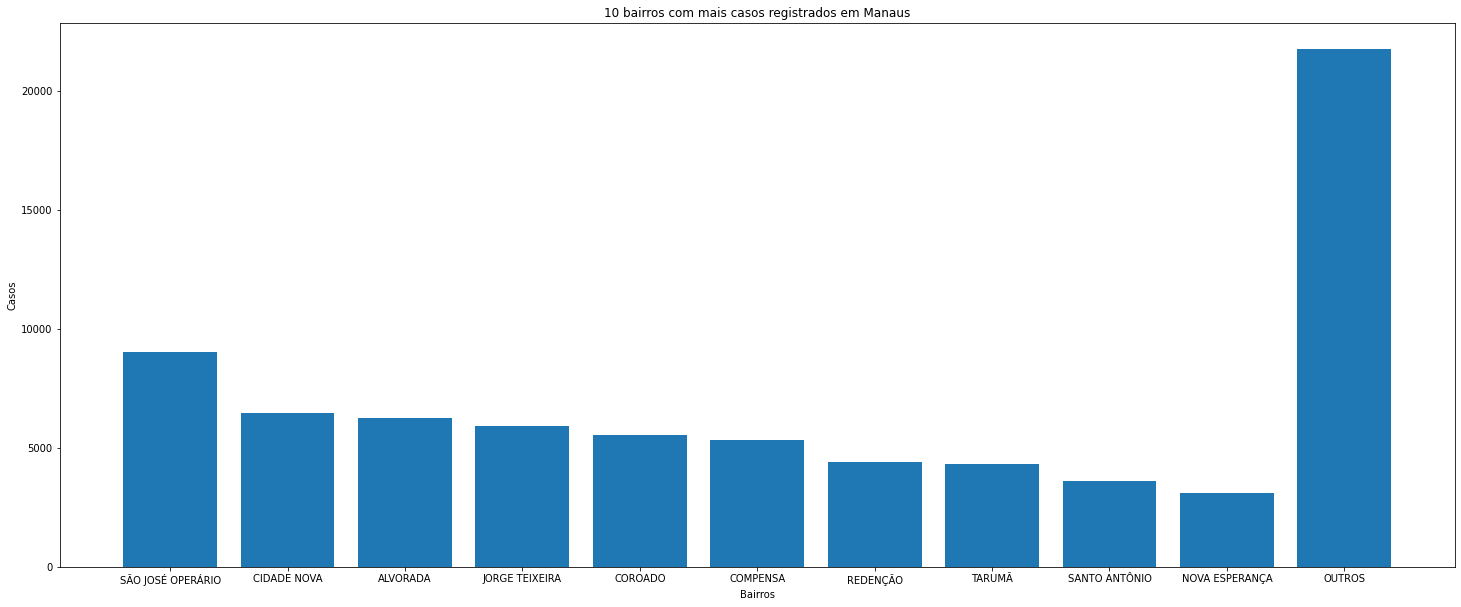

In [ ]:
indices_bairros = df2._bairro_mapa.value_counts().keys().tolist()
nomes_bairros = df2._bairro_mapa.value_counts().tolist()

indices_ignorados = []

for i in range(len(indices_bairros)):
  for j in range(i + 1, len(indices_bairros)):
    if compare_first_five_letters(indices_bairros[i], indices_bairros[j]):
      nomes_bairros[i] += nomes_bairros[j]
      indices_ignorados.append(j)

for i in sorted(indices_ignorados, reverse = True):
  del indices_bairros[i]
  del nomes_bairros[i]

df_bairros = pd.DataFrame({'bairros': indices_bairros, 'casos': nomes_bairros})
df_bairros.sort_values(by=['casos'], ascending=False, inplace=True)
df_bairros = df_bairros.head(10).append({'bairros': 'OUTROS', 'casos': df_bairros.iloc[0:3, 1:2].sum()[0]}, ignore_index=True)

plt.figure(figsize=(25, 10))
plt.title('10 bairros com mais casos registrados em Manaus')
plt.xlabel('Bairros')
plt.ylabel('Casos')
plt.bar(df_bairros.bairros.tolist(), df_bairros.casos.tolist())

plt.show()

**Denote, por sexo, o boxplot da idade dos casos confirmados. Há outliers?**

R: Sim, pelo gráfico identificamos que há idades por volta de 120

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


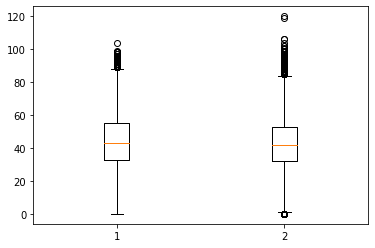

In [ ]:
df_sexo = df2[['_sexo', '_idade', '_classificacao']].dropna()
homens = df_sexo[(df_sexo['_sexo'] == 'M') & (df_sexo['_classificacao'] == 'Confirmado')]
mulheres = df_sexo[(df_sexo['_sexo'] == 'F') & (df_sexo['_classificacao'] == 'Confirmado')]

dados = [[int(idade) for idade in homens._idade.tolist()], 
        [int(idade) for idade in mulheres._idade.tolist()]]
       
plt.boxplot(dados)
plt.show()

**Denote em um gráfico de barras o número de novos casos por dia, considerando os 10 últimos dias existentes na base de dados;**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()


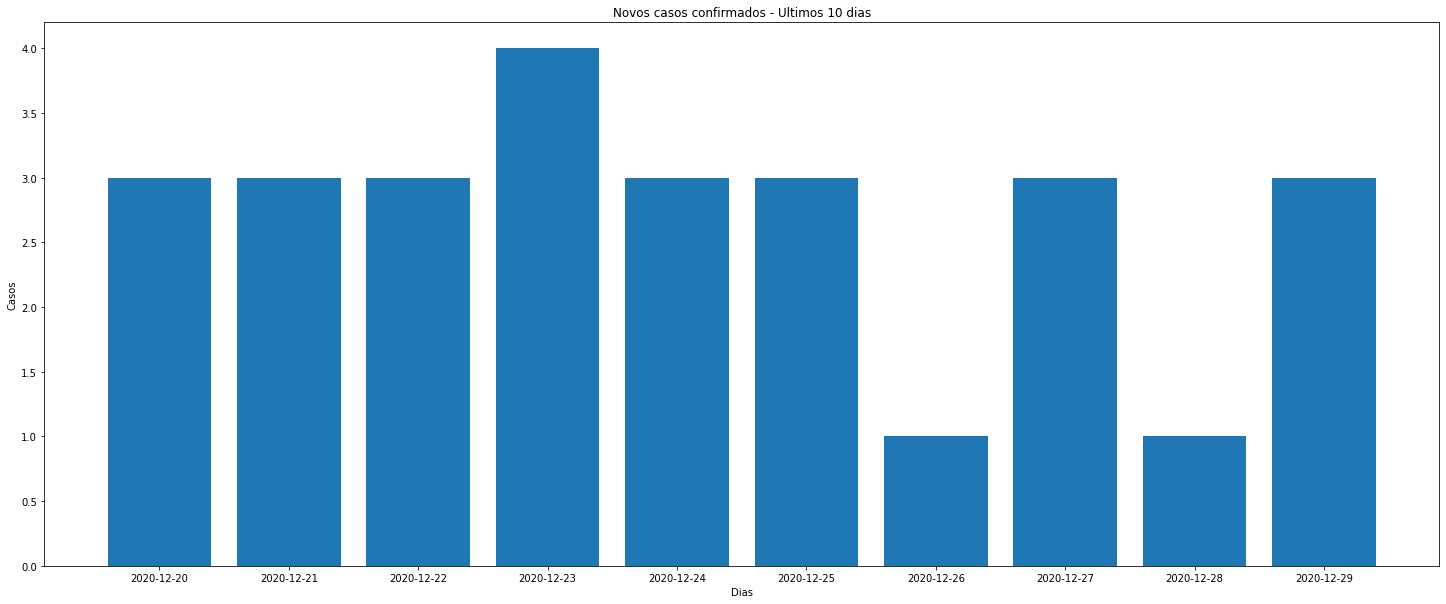

In [ ]:
df_novos_casos = df2[['_dt_notificacao', '_classificacao']].dropna()

data_em_ingles = df_novos_casos._dt_notificacao.tolist()
data_em_ingles = [datetime.datetime.strptime(date.split()[0], '%d/%m/%Y').strftime('%Y-%m-%d') for date in data_em_ingles]
df_novos_casos._dt_notificacao = data_em_ingles

df_novos_casos['descartado'] = [1 if i == 'Descartado' else 0 for i in df_novos_casos._classificacao]
df_novos_casos['confirmado'] = [1 if i == 'Confirmado' else 0 for i in df_novos_casos._classificacao]
df_novos_casos['em_analise'] = [1 if i == 'Em análise' else 0 for i in df_novos_casos._classificacao]

df_novos_casos = df_novos_casos.groupby(['_dt_notificacao'])['descartado', 'confirmado', 'em_analise'].agg('sum')
df_novos_casos.sort_values(by=['_dt_notificacao'], ascending=True, inplace=True)

plt.figure(figsize=(25, 10))
plt.title('Novos casos confirmados - Ultimos 10 dias')
plt.xlabel('Dias')
plt.ylabel('Casos')
plt.bar(df_novos_casos.index[-10:], df_novos_casos.confirmado.tolist()[-10:])

plt.show()

**Repita o gráfico anterior considerando o número de casos recuperados;**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()


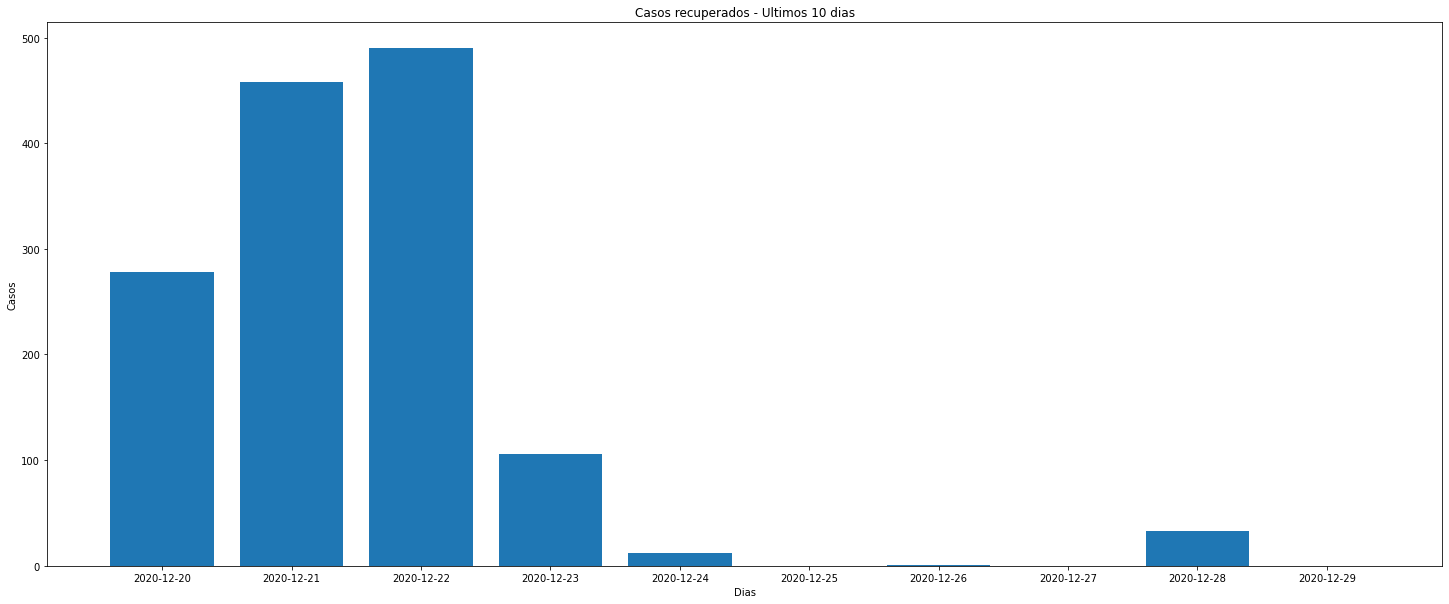

In [ ]:
df_recuperados = df2[['_dt_evolucao', '_conclusao']].dropna()

data_em_ingles = df_recuperados._dt_evolucao.tolist()
data_em_ingles = [datetime.datetime.strptime(date.split()[0], '%d/%m/%Y').strftime('%Y-%m-%d') for date in data_em_ingles]
df_recuperados._dt_evolucao = data_em_ingles

df_recuperados['recuperado'] = [1 if i == 'Recuperado' else 0 for i in df_recuperados._conclusao]
df_recuperados['obito'] = [1 if i == 'Óbito' else 0 for i in df_recuperados._conclusao]
df_recuperados['obito_outra_causa'] = [1 if i == 'Óbito por outras causas' else 0 for i in df_recuperados._conclusao]

df_recuperados = df_recuperados.groupby(['_dt_evolucao'])['recuperado', 'obito', 'obito_outra_causa'].agg('sum')
df_recuperados.sort_values(by=['_dt_evolucao'], ascending=True, inplace=True)

plt.figure(figsize=(25, 10))
plt.title('Casos recuperados - Ultimos 10 dias')
plt.xlabel('Dias')
plt.ylabel('Casos')
plt.bar(df_recuperados.index[-10:], df_recuperados.recuperado.tolist()[-10:])

plt.show()

**Construa um histograma que denote a quantidade percentual de casos por grupo etário, considerando que cada grupo contempla uma década (0 a 10 anos, 11 a 20 anos, etc.);**

<BarContainer object of 9 artists>

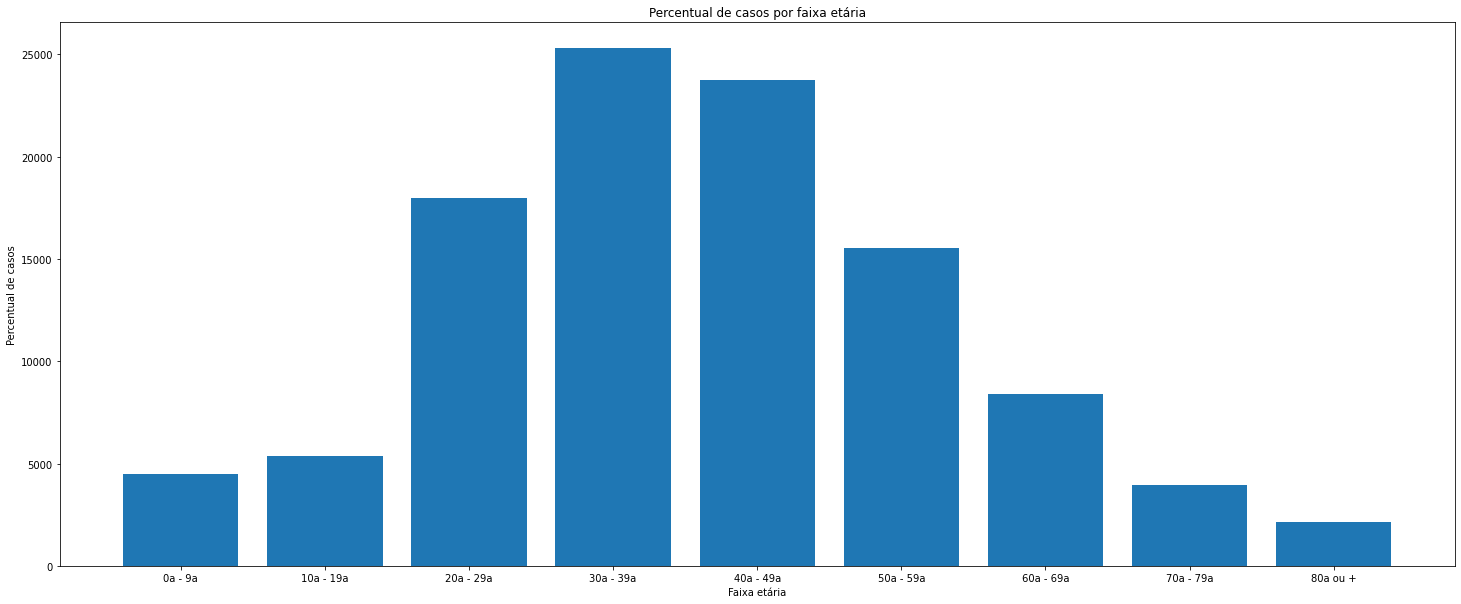

In [ ]:
df_faixa_etaria = df2['_faixa etária'].dropna()
df_faixa_etaria = df_faixa_etaria.replace(to_replace=" < 1a", value="0a - 1a")
labels_faixa_etaria = [data.strip() for data in df_faixa_etaria]
indices_faixa_etaria = [1 for i in range(1, len(labels_faixa_etaria) + 1)]
df_faixa_etaria = pd.DataFrame({'faixa': labels_faixa_etaria, 'idx': indices_faixa_etaria})

grupo1 = ["0a - 1a", "1a - 4a", "5a - 9a"]
grupo2 = ['10a - 14a', '15a - 19a']
agrupamento1 = df_faixa_etaria.loc[df_faixa_etaria['faixa'].isin(grupo1)]
agrupamento2 = df_faixa_etaria.loc[df_faixa_etaria['faixa'].isin(grupo2)]

df_faixa_etaria_atualizada = pd.DataFrame({'faixa': ['0a - 9a', '10a - 19a'], 
                                           'idx': [agrupamento1.idx.sum(), agrupamento2.idx.sum()]})

df_faixa_etaria = df_faixa_etaria.copy()
for i in grupo1 + grupo2:
  df_faixa_etaria = df_faixa_etaria.drop(df_faixa_etaria[df_faixa_etaria['faixa'] == i].index)

df_faixa_etaria = df_faixa_etaria.groupby(['faixa'])['idx'].agg('sum')
df_faixa_etaria = pd.DataFrame({'faixa': df_faixa_etaria.index, 'idx': df_faixa_etaria.values})
df_faixa_etaria_atualizada = df_faixa_etaria_atualizada.append(df_faixa_etaria)

porcentagem = ['{:.2f} %'.format(data * 100 / len(df2['_faixa etária'].dropna().index)) for data in df_faixa_etaria_atualizada.idx]
df_faixa_etaria_atualizada['porcentagem'] = porcentagem

plt.figure(figsize=(25, 10))
plt.title('Percentual de casos por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Percentual de casos')
plt.bar(df_faixa_etaria_atualizada.faixa, df_faixa_etaria_atualizada.idx)

**Elabore um gráfico que mostra o cumulativo de casos notificados ao longo do tempo;**

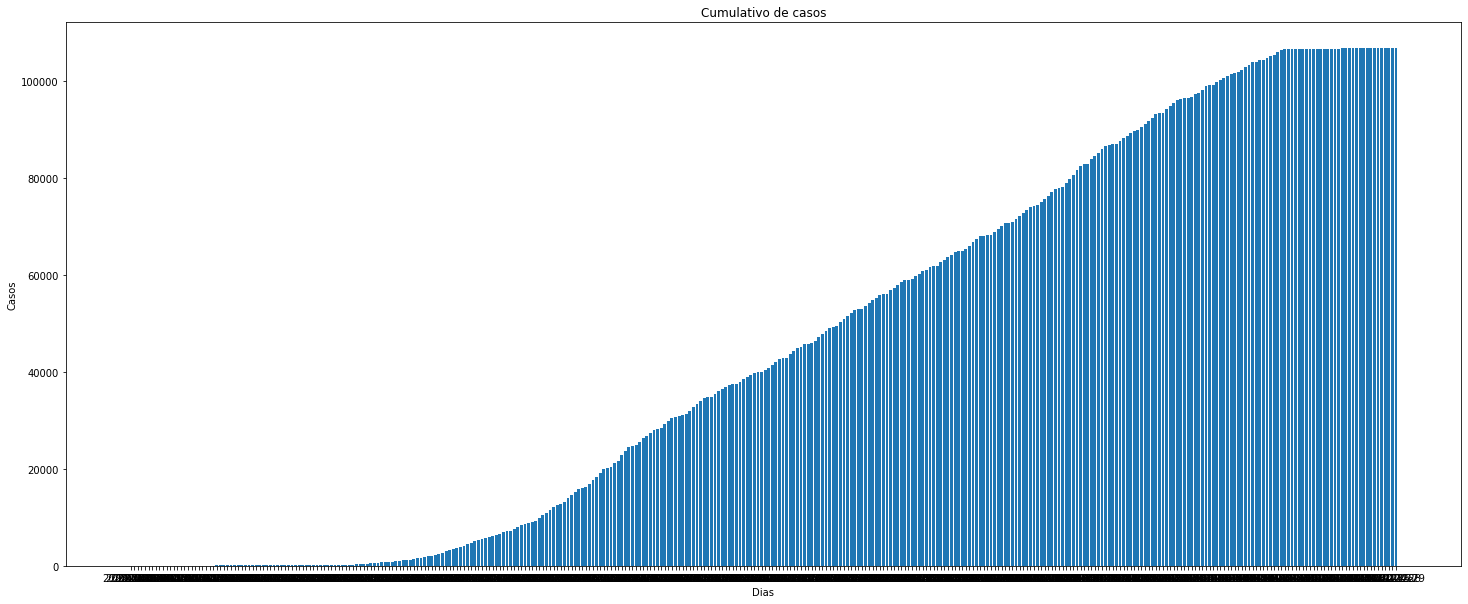

In [ ]:
df_cumulativo = df2[['_dt_notificacao']].dropna()

data_em_ingles = df_cumulativo._dt_notificacao.tolist()
data_em_ingles = [datetime.datetime.strptime(date.split()[0], '%d/%m/%Y').strftime('%Y-%m-%d') for date in data_em_ingles]
df_cumulativo._dt_notificacao = data_em_ingles

df_cumulativo.sort_values(by=['_dt_notificacao'], ascending=False, inplace=True)

indices = [1 for i in range(1, len(df_cumulativo.index) + 1)]
df_cumulativo['idx'] = indices
df_cumulativo = df_cumulativo.groupby(['_dt_notificacao'])['idx'].agg('sum')

new_idxs_list = []
count = 0
for i in df_cumulativo.values:
  count += i
  new_idxs_list.append(count)

plt.figure(figsize=(25, 10))
plt.title('Cumulativo de casos')
plt.xlabel('Dias')
plt.ylabel('Casos')
plt.bar(df_cumulativo.index, new_idxs_list)

plt.show()

**Faça um gráfico do tipo scatterplot que denote a idade versus o número total de casos registrado para aquela idade. Aproveite o processamento efetuado para o cálculo da correlação. É possível observar alguma tendência?**

*R: O maior numero de casos é observado em torno dos 50 anos de idade.*

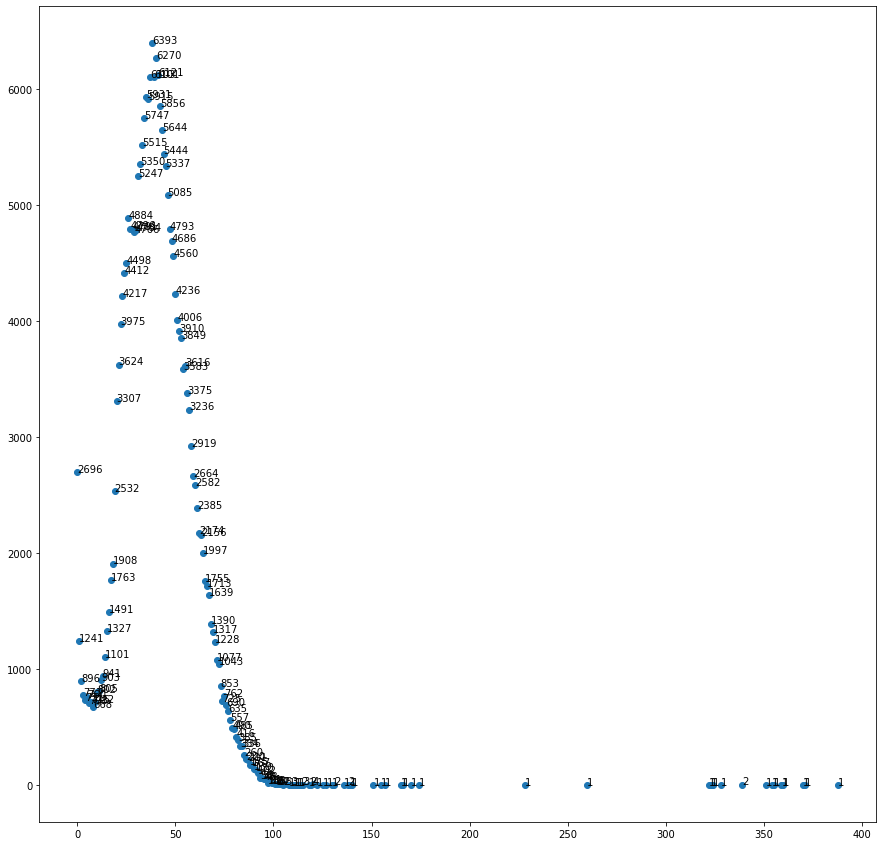

In [ ]:
df_idade_scatter = df[['_idade']].dropna()

indices = [1 for i in range(1, len(df_idade_scatter.index) + 1)]
df_idade_scatter.sort_values(by=['_idade'], ascending=False, inplace=True)
df_idade_scatter['idx'] = indices
df_idade_scatter = df_idade_scatter.groupby(['_idade'])['idx'].agg('sum')

fig, ax = plt.subplots(figsize = (15, 15))
ax.scatter(df_idade_scatter.index, df_idade_scatter.values)

for i, txt in enumerate(df_idade_scatter.values):
    ax.annotate(txt, (df_idade_scatter.index[i], df_idade_scatter.values[i]))

**Uma tarefa de classificação mediante Aprendizado Supervisionado que poderia ser feita com esta base de dados. Qual seria o atributo-alvo? Quais métricas de desempenho poderiam ser aplicadas? Que tipo de validação seria apropriado?**

R: 
- Atributo-alvo: _conclusao no intuito de classificar binariamente entre recuperação e óbito
- Métricas: Poderia-se utilizar da revocação, com o foco em saber entre todos os casos classificados como recuperação, quantos foram de fato recuperados.

**Uma tarefa de regressão mediante Aprendizado Supervisionado que poderia ser feita com esta base de dados. Qual seria o atributo-alvo? Quais atributos preditores a equipe considera relevantes para o cenário?**

R:
- Atributo-alvo: quantidade de casos registrados por dia
- Atributos preditores: idade, comorbidades e sintomas